## Цель

1) Выявить модели, которые хорошо продаются по категориям(зима, осень...ботинки, туфли...)\
2) Выявить модели, которые плохо продаются по категориям(зима, осень...ботинки, туфли...)\
3) Проблемные модели по оборачиваемости(залеживаются на складе)\
4) Проблемные модели по оборачиваемости(заканчиваются на складе)\
5) Рекомендуемое кол-во на складе

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Цель" data-toc-modified-id="Цель-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Цель</a></span></li></ul></li><li><span><a href="#Создать-единый-датафрейм" data-toc-modified-id="Создать-единый-датафрейм-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Создать единый датафрейм</a></span></li><li><span><a href="#Создать-колонку-с-датами-в-правой-части-тадлицы,-удалить-лишнии-столбцы" data-toc-modified-id="Создать-колонку-с-датами-в-правой-части-тадлицы,-удалить-лишнии-столбцы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создать колонку с датами в правой части тадлицы, удалить лишнии столбцы</a></span></li><li><span><a href="#Посчитать-оборачиваемость-моделей-обуви." data-toc-modified-id="Посчитать-оборачиваемость-моделей-обуви.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитать оборачиваемость моделей обуви.</a></span><ul class="toc-item"><li><span><a href="#Предложить-оптимальную-оборачиваемость-и-оптимальное-кол-во-начала-периода" data-toc-modified-id="Предложить-оптимальную-оборачиваемость-и-оптимальное-кол-во-начала-периода-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предложить оптимальную оборачиваемость и оптимальное кол-во начала периода</a></span></li></ul></li><li><span><a href="#Выделить-топ-моделей-за-весь-период" data-toc-modified-id="Выделить-топ-моделей-за-весь-период-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выделить топ моделей за весь период</a></span></li><li><span><a href="#Выделить-категории(сезон,-вид,-продажи)" data-toc-modified-id="Выделить-категории(сезон,-вид,-продажи)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выделить категории(сезон, вид, продажи)</a></span></li></ul></div>

# Создать единый датафрейм

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import os

In [2]:
def  get_files_in_folder(path):
   return os.listdir(path)

In [3]:
try:
    files = get_files_in_folder(
    'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Тестовые\\Тестовое задание Панда\\tables\\'
                                )
except:
    files = get_files_in_folder(
    'C:\\Users\\Александр\\OneDrive\\Рабочий стол\\Python\\ЯндексПрактикум\\Тестовые\\Тестовое задание Панда\\tables\\'
                                )
print(
    'Начало {} ... конец {}'.format(files[0], files[-1])
        ) 

Начало 2022-2022-07-18-12-54-42.xls ... конец 2022-2022-07-18-13-06-47.xls


In [4]:
table_names=[]
for i in range(len(files)): 
    a = 'table'+f'{i}'
    table_names.append(a)
table_names[0:4]

['table0', 'table1', 'table2', 'table3']

In [5]:


def open_file(file_name, table_name):    
            # Прописываем пути
            pth1 = 'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Тестовые\\Тестовое задание Панда\\tables\\'
            pth2 = 'C:\\Users\\Александр\\OneDrive\\Рабочий стол\\Python\\ЯндексПрактикум\\Тестовые\\Тестовое задание Панда\\tables\\'

            # конструция для загрузки файлов if elif
            if os.path.exists(pth1):

                table_name = pd.read_excel(pth1+file_name)

            elif os.path.exists(pth2):

                table_name = pd.read_excel(pth2+file_name)

            else:
                print('Увы и ах, но нет файлов')

            return table_name

tables=[]
for i in range(len(files)):
    globals()[table_names[i]]=open_file(files[i], table_names[i])
    tables.append(globals()[table_names[i]])

# Создать колонку с датами в правой части тадлицы, удалить лишнии столбцы

In [6]:
def preob(table):
    table=table.drop(index=[0,1,2,3,4,7,9], axis=1)
    table=table.drop(
    columns=['Unnamed: 0','Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10', 'Unnamed: 12'], axis=0
)
    table['start_period'] = table.loc[5,'Unnamed: 3']
    table['finish_period'] = table.loc[8,'Unnamed: 3']
    table['stock'] = table.loc[6,'Unnamed: 3']
    table=table.drop(index=[5,6,8,11], axis=1)
    table=table.reset_index(drop=True)
    table=table.drop(index=[1], axis=1)
    table.columns=table.iloc[0,:]
    table=table.drop(index=[0], axis=1)
    table=table.rename(columns={table.columns[3]:'Кол-во',
                         table.columns[-1]:'Старт',
                         table.columns[-3]:'Финиш'}).reset_index(drop=True)
    return table

In [7]:
for i in range(len(tables)):
    
    tables[i]=preob(tables[i])

In [8]:
finish_table=pd.concat(tables)
finish_table = finish_table.dropna()
finish_table.iloc[:,[4,5,6,7]]=finish_table.iloc[:,[4,5,6,7]].astype('int')
finish_table.head()

,Код,Артикул,Наименование,Кол-во,Начало периода,Приход,Расход,Конец периода,Финиш,Ольга+Лана (ЕКБ),Старт
0,01025,32100,Ботинки женские MARKO (арт. 32100),шт,58,0,1,57,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00
1,01026,32106,Ботинки женские MARKO (арт. 32106),шт,34,0,1,29,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00
2,01032,350251,Ботинки женские MARKO (арт. 350251),шт,35,0,2,33,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00
3,01041,421061,Ботинки Мужской MARKO (арт. 421061),шт,37,0,1,34,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00
4,00148,В 13-2,"Женские ботинки MARKO (коричневые, осень) (арт...",шт,1,0,1,0,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00


In [9]:
finish_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3094 entries, 0 to 119
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Код               3094 non-null   object        
 1   Артикул           3094 non-null   object        
 2   Наименование      3094 non-null   object        
 3   Кол-во            3094 non-null   object        
 4   Начало периода    3094 non-null   int32         
 5   Приход            3094 non-null   int32         
 6   Расход            3094 non-null   int32         
 7   Конец периода     3094 non-null   int32         
 8   Финиш             3094 non-null   datetime64[ns]
 9   Ольга+Лана (ЕКБ)  3094 non-null   object        
 10  Старт             3094 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(4), object(5)
memory usage: 241.7+ KB


In [10]:
finish_table.describe()

,Начало периода,Приход,Расход,Конец периода
count,3094.000000,3094.000000,3094.000000,3094.000000
mean,45.634131,0.619263,2.769877,39.993859
std,43.761063,2.028371,2.748197,40.984415
min,0.000000,0.000000,0.000000,-1.000000
25%,15.000000,0.000000,1.000000,12.000000
50%,36.000000,0.000000,2.000000,30.000000
75%,67.000000,0.000000,3.000000,58.000000
max,696.000000,27.000000,28.000000,575.000000


# Посчитать оборачиваемость моделей обуви.

In [11]:
cicle=7

Средняя оборачиваемость моделей за весь период

In [12]:
turnover=finish_table.groupby(['Код' ,'Наименование']).agg({
                                                                'Начало периода':'median',
                                                                'Расход':'median'
                                                          })
turnover['Оборачиваемость'] = turnover['Начало периода'] * cicle / turnover['Расход']
turnover.describe()

,Начало периода,Расход,Оборачиваемость
count,966.000000,966.000000,966.000000
mean,40.526398,2.489648,140.629271
std,40.140757,1.915277,144.680275
min,0.500000,0.500000,2.333333
25%,12.000000,1.000000,42.000000
50%,32.500000,2.000000,98.000000
75%,61.500000,3.000000,186.375000
max,575.000000,13.000000,1085.000000


In [13]:
turnover.sort_values(by='Оборачиваемость')

,,Начало периода,Расход,Оборачиваемость
Код,Наименование,,,
01284,"Женские ботинки MARKO (черные, осень) (арт. E 3007-2)",1.5,4.5,2.333333
01817,"Женские сапоги MARKO (черные, зима) (арт. Н 3151-1)",1.0,2.0,3.500000
01741,"Женские полусапоги MARKO (черные, осень) (арт. b 703)",0.5,1.0,3.500000
01298,"Женские ботинки MARKO (синие, осень) (арт. BK 255-5)",3.0,5.0,4.200000
00039,"Женские полусапоги MARKO (черные, осень) (арт. Е 963-1)",1.0,1.0,7.000000
...,...,...,...,...
02492,"Женские туфли MARKO (черные, лето) (арт. Z 83-3)",112.0,1.0,784.000000
02498,"Женские туфли MARKO (серебристо-черные, лето) (арт. K 25-5)",115.0,1.0,805.000000
01144,"Женские ботинки MARKO (бордовые, зима) (арт. 623-9)",122.0,1.0,854.000000


>Чем больше оборачиваемость, тем меньше товар залеживется на складе.

<AxesSubplot:xlabel='Оборачиваемость', ylabel='Count'>

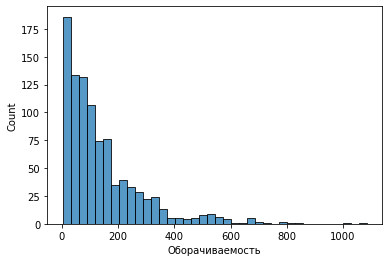

In [14]:
sns.histplot(turnover['Оборачиваемость'])

    Для на оптимально держать оборачиваемость на уровне 7, что бы раз в неделю поплнять запасы магазина. И иметь страховой запас еще на 7 дней. Значит будем держать оборачиваемость в районе 14 дней. 
    
    Как видим из графика склад у нас очень забит

## Предложить оптимальную оборачиваемость и оптимальное кол-во начала периода 

In [15]:
turnover_optim=14

In [16]:
turnover['Начало периода - оптимальное'] = turnover_optim * turnover['Расход'] / cicle
turnover

,,Начало периода,Расход,Оборачиваемость,Начало периода - оптимальное
Код,Наименование,,,,
00039,"Женские полусапоги MARKO (черные, осень) (арт. Е 963-1)",1.0,1.0,7.000000,2.0
00044,"Мужские ботинки MARKO (серые, зима) (арт. ОМ 56 z)",1.0,1.0,7.000000,2.0
00095,"Женские ботинки MARKO (синие, осень) (арт. F 07-3)",1.0,1.0,7.000000,2.0
00097,"Женские ботинки MARKO (синие, осень) (арт. F 09-3)",4.0,1.0,28.000000,2.0
00099,"Женские ботинки MARKO (синие, осень) (арт. H 08-3)",9.0,8.0,7.875000,16.0
...,...,...,...,...,...
02636,"Женские туфли MARKO (бело-коричневые, лето) (арт. 5016-3)",81.0,2.0,283.500000,4.0
02641,"Женские туфли MARKO (серо-бежевые, лето) (арт. 1612-1)",67.0,4.0,117.250000,8.0
02643,"Женские кроссовки MARKO (в ассортименте, лето) (арт. 3202)",575.0,13.0,309.615385,26.0


<AxesSubplot:xlabel='Начало периода - оптимальное', ylabel='Count'>

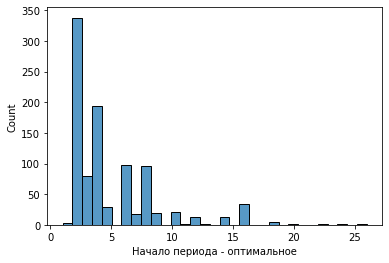

In [17]:
sns.histplot(turnover['Начало периода - оптимальное'])

Выявим те модели которые необходимо пополнить

In [18]:
def add_model(row):
    
    if row['Начало периода'] < row['Начало периода - оптимальное']:
        return 'Поплнить склад'
    elif row['Начало периода'] > 2*row['Начало периода - оптимальное']:
        return 'Много излишков'
    else:
        return 'Оптимально'

<AxesSubplot:xlabel='Итог по складу', ylabel='Count'>

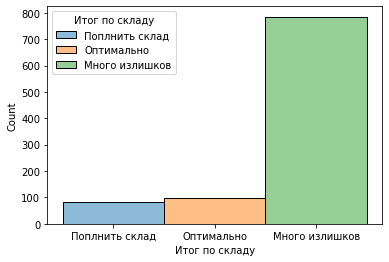

In [19]:
turnover['Итог по складу'] = turnover.apply(add_model, axis=1)

sns.histplot(data=turnover, x=turnover["Итог по складу"], hue="Итог по складу")

Очень много излишков.

# Выделить топ моделей за весь период

In [20]:
top=list(turnover.query('Расход > 8').reset_index()['Наименование'])
top

['Женские ботинки MARKO (красные, осень) (арт. D 3135-2)',
 'Женские ботинки MARKO (красные, осень) (арт. Z 03-2)',
 'Женские ботинки MARKO (бордовые, осень) (арт. BK 262-8a)',
 'Женские туфли MARKO (бордовые, лето) (арт. BK 370-8)',
 'Женские туфли MARKO (белые, лето) (арт. 301-3)',
 'Женские туфли MARKO (белые, лето) (арт. 2845-1)',
 'Женские туфли MARKO (белые, лето) (арт. 8802-3)',
 'Женские туфли MARKO (голубые, лето) (арт. 301-10)',
 'Женские кроссовки MARKO (в ассортименте, лето) (арт. 3202)',
 'Мужские кроссовки MARKO (в ассортименте, лето) (арт. 2102)']

<AxesSubplot:xlabel='Финиш'>

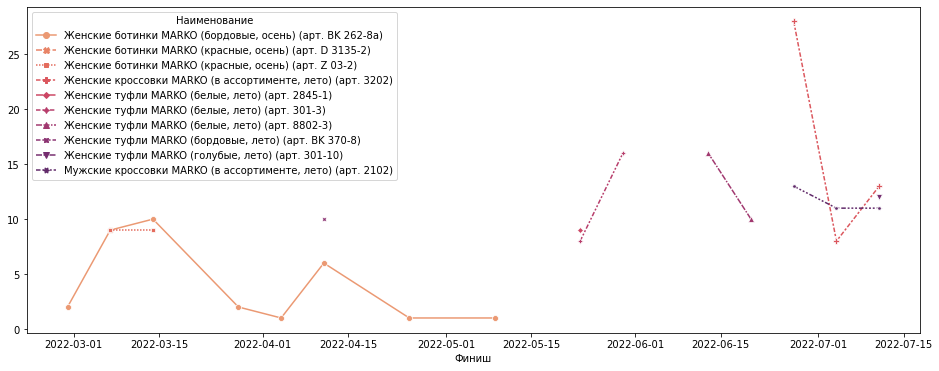

In [21]:
fig = plt.figure(figsize=(16,6))

sns.lineplot(
    data=finish_table.query("Наименование==@top").pivot_table(
        index='Наименование', columns='Финиш', values='Расход').T, legend=True, palette="flare", markers=True 
)

На графике мы можем наблюдать цикл продаж топ товаров 

# Выделить категории(сезон, вид, продажи)

In [22]:
def category_season(row):
    
    if 'осень' in row['Наименование']:
        return 'Осенняя обувь'
    
    elif 'осень' in row['Наименование']:
        return 'зимняя обувь'
    
    elif 'лето' in row['Наименование']:
        return 'летняя обувь'
    
    else:
        return 'другой'
    
def category_type(row):
    
    if 'ботинки' in row['Наименование']:
        return 'ботинки'
    
    elif 'сапоги' in row['Наименование']:
        return 'сапоги'
    
    elif 'лето' in row['Наименование']:
        return 'туфли'
    
    else:
        return 'другой'

In [23]:
finish_table['сезон'] = finish_table.apply(category_season, axis=1)
finish_table['вид'] = finish_table.apply(category_type, axis=1)
finish_table.head()

,Код,Артикул,Наименование,Кол-во,Начало периода,Приход,Расход,Конец периода,Финиш,Ольга+Лана (ЕКБ),Старт,сезон,вид
0,01025,32100,Ботинки женские MARKO (арт. 32100),шт,58,0,1,57,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00,другой,другой
1,01026,32106,Ботинки женские MARKO (арт. 32106),шт,34,0,1,29,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00,другой,другой
2,01032,350251,Ботинки женские MARKO (арт. 350251),шт,35,0,2,33,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00,другой,другой
3,01041,421061,Ботинки Мужской MARKO (арт. 421061),шт,37,0,1,34,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00,другой,другой
4,00148,В 13-2,"Женские ботинки MARKO (коричневые, осень) (арт...",шт,1,0,1,0,2022-01-24,Ольга+Лана (ЕКБ),2022-01-30 23:59:00,Осенняя обувь,ботинки


In [24]:
finish_table.pivot_table(index=['сезон','вид'], values='Расход', aggfunc='sum').reset_index()

,сезон,вид,Расход
0,Осенняя обувь,ботинки,2041
1,Осенняя обувь,другой,2
2,Осенняя обувь,сапоги,201
3,другой,ботинки,626
4,другой,другой,304
5,другой,сапоги,467
6,летняя обувь,ботинки,16
7,летняя обувь,туфли,4913


<AxesSubplot:xlabel='вид', ylabel='Расход'>

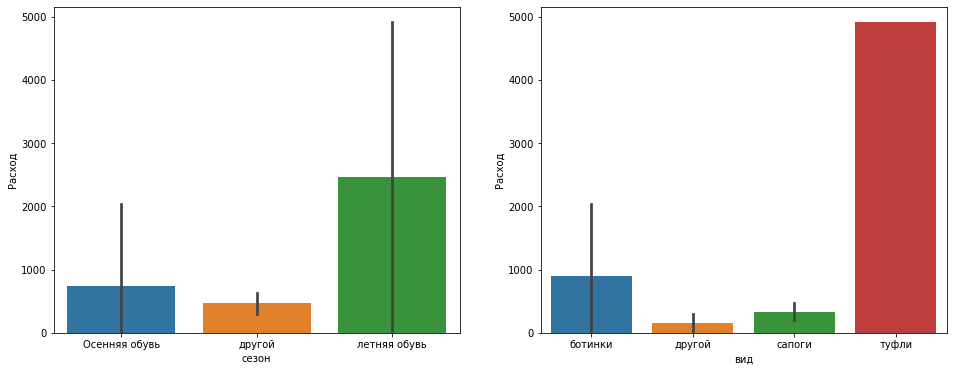

In [25]:
fig = plt.figure(figsize=(16,6))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)


sns.barplot(data=finish_table.pivot_table(index=['сезон','вид'], values='Расход', aggfunc='sum').reset_index(),
             x='сезон',
             y='Расход',
             #hue=finish_table.pivot_table(index=['сезон','вид'], values='Расход', aggfunc='sum').reset_index().iloc[:,0],
             ax=ax1
            )

sns.barplot(data=finish_table.pivot_table(index=['сезон','вид'], values='Расход', aggfunc='sum').reset_index(),
             x='вид',
             y='Расход',
             #hue=finish_table.pivot_table(index=['сезон','вид'], values='Расход', aggfunc='sum').reset_index().iloc[:,1],
             ax=ax2
            )

На графике наглядно видно обувь какого сезона и вида. Лучше продавалась, скажем основа ABC-XYZ анализа.

    1) Выявить модели, которые хорошо продаются по категориям(зима, осень...ботинки, туфли...)
    2) Выявить модели, которые плохо продаются по категориям(зима, осень...ботинки, туфли...)
    3) Проблемные модели по оборачиваемости(залеживаются на складе)
    4) Проблемные модели по оборачиваемости(заканчиваются на складе)
    5) Рекомендуемое кол-во на складе
    
    
    Я могу выдать эксель файл с кодами и артикулами моделей которые хорошо продаются, и у них дефицит. Что будет значить что именно эти позоции пополнить.
    Так же можно выявить модели которые плохо продаются и у них излишки на складе, можно будет реализовать их со скидной, иначе так и пролежат.
    Так же можно выделаить категории, которые приносят нам основной доход, на них делать упор взависимости от сезона.
    Ну и могу выдать рекомендуемо кол-во товара на складе относительно его продажи.
    